In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
data = pd.read_csv('names.txt', header=None)
data.columns = ['name']
data

,name
0,emma
1,olivia
2,ava
3,isabella
4,sophia
...,...
32028,zylas
32029,zyran
32030,zyrie
32031,zyron


In [6]:
with open('names.txt') as f:
    names = [name.strip() for name in f.readlines()]
    
names[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

**Биграмма** букв - это пара букв, которые стоят рядом в слове. Например, в слове "кот" биграммы это "^к", "ко", "от", и "т$" (*^ и $ — начало и конец слова.*)

Мы используем биграммы букв, чтобы лучше понимать, какие пары букв чаще всего встречаются в словах. Это может быть полезно, например, для предсказания следующего слова в предложении или определения языка, на котором написан текст. 

Представьте что вам нужно придумать имя для вашего ребенка. У вас есть список уже существующих имен. Ваша задача: придумать **новое имя!**

In [7]:
name = 'кот'
bag_of_bigrams = []
bag_of_bigrams.append(f'^{name[0]}')
for i in range(len(name)-1):
    bag_of_bigrams.append(f'{name[i]}{name[i+1]}')
    
bag_of_bigrams.append(f'{name[-1]}$')

bag_of_bigrams

['^к', 'ко', 'от', 'т$']

In [8]:
def bigram_transform(names):
    bag_of_bigrams = []
    for name in names:
        bag_of_bigrams.append(f'^{name[0]}')
        
        for i in range(len(name)-1):
            bag_of_bigrams.append(f'{name[i]}{name[i+1]}')
            
        bag_of_bigrams.append(f'{name[-1]}$')
        
    return bag_of_bigrams


bag_of_bigrams = bigram_transform(names)

bag_of_bigrams[:10]

['^e', 'em', 'mm', 'ma', 'a$', '^o', 'ol', 'li', 'iv', 'vi']

In [32]:
print('Total names:', len(names))
print('Total bigrams:', len(bag_of_bigrams))

Total names: 32033
Total bigrams: 228146


**Логика модели:**

- Прочитайте данные с файла в структуры данных удобных для высчитывания вероятностей
- Высчитайте вероятность всех существующих биграмм (строим выборку)
- Возьмите букву из выборки которое может придти как первая буква имени (рандомно)
- Продолжать тянуть следующую букву из выборки, таким образом генерируя имя. Это нужно делать пока вы не вытянули конец имени.

**Пользователь**

- Generate function - возможность создавать имя.
- получить таблицу визуализирующие вероятности биграмм

In [33]:
# there I've created part of probibility for generating names.

name_probability = {}

for bigram in bag_of_bigrams:
    first_letter, second_letter = bigram
    if first_letter not in name_probability:
        name_probability[first_letter] = {}
        
    if second_letter not in name_probability[first_letter]:
        name_probability[first_letter][second_letter] = 0
        
    name_probability[first_letter][second_letter] += 1
    
for first_letter in name_probability:
    sum_of_frequency = sum(name_probability[first_letter].values())
    for second_letter in name_probability[first_letter]:
        name_probability[first_letter][second_letter] /= sum_of_frequency
    
print(name_probability['^'])

{'e': 0.04779446196110261, 'o': 0.012299815814940843, 'a': 0.1376705272687541, 'i': 0.018449723722411264, 's': 0.0641525926388412, 'c': 0.04813785783410857, 'm': 0.07923079324446665, 'h': 0.027284363000655575, 'v': 0.011737895295476539, 'l': 0.049074392033215744, 'g': 0.020884712640089908, 'p': 0.01607717041800643, 'r': 0.05116598507788843, 'z': 0.029001342365685388, 'n': 0.035775606405893924, 'b': 0.04077045546779883, 'k': 0.09249836106515157, 'w': 0.009583866637530048, 'q': 0.0028720382105953237, 'j': 0.07560952767458558, 'd': 0.052758093216370615, 'x': 0.004183186089345363, 't': 0.040832891081072645, 'f': 0.013017825367589672, 'y': 0.016701526550744545, 'u': 0.002434988917678644}


In [12]:
def next_letter_by_probability(letter='^', probability_dict={'^': {'*': 1.0}}):
    next_letter = np.random.choice(
        list(probability_dict[letter].keys()), 
        size=1, 
        replace=False, 
        p=list(probability_dict[letter].values())
    )[0]
    return next_letter

In [15]:
def generate_function(probability_dict={'^': {'*': 1.0}}):
    first_letter = np.random.choice(list(name_probability.keys()))
    generated_name = f'{first_letter}'
    length_name = 0
    while first_letter != '$':
        old_letter = first_letter
        first_letter = next_letter_by_probability(first_letter, probability_dict)
        if first_letter == '$' and length_name < 3:
            first_letter = old_letter
            continue
        generated_name += first_letter
        length_name += 1
        
    return generated_name.replace('^', '').replace('$', '')

In [29]:
print('30 generated names:')
for _ in range(30):
    generated_name = generate_function(name_probability)
    print('\t', generated_name)

30 generated names:
	 panin
	 usanirveyn
	 calivathns
	 wmatacan
	 viceim
	 uios
	 jalan
	 uvahatomans
	 kleete
	 arriah
	 jatin
	 konasha
	 hanekarak
	 wicaddalarl
	 prsmayn
	 ffalie
	 zani
	 uluinyal
	 xzlye
	 wanyreruchomyai
	 choloshave
	 yarania
	 erilisupaallezereno
	 ynary
	 rssarl
	 vela
	 mancrigeyamiridh
	 bemaro
	 etionamareverorinndie
	 brsah


**Бонус**

- использование и оптимизирование с помощью библиотеки **pytorch**
- визуализация таблицы в картинку (подойдет любая библиотека)

### __Rows mean the first letter, columns for the second part. e.g.__

### __If we have some kind of letter "j", and after it there should be next letter with the highest probability is "a"(0.51%)__

<AxesSubplot:>

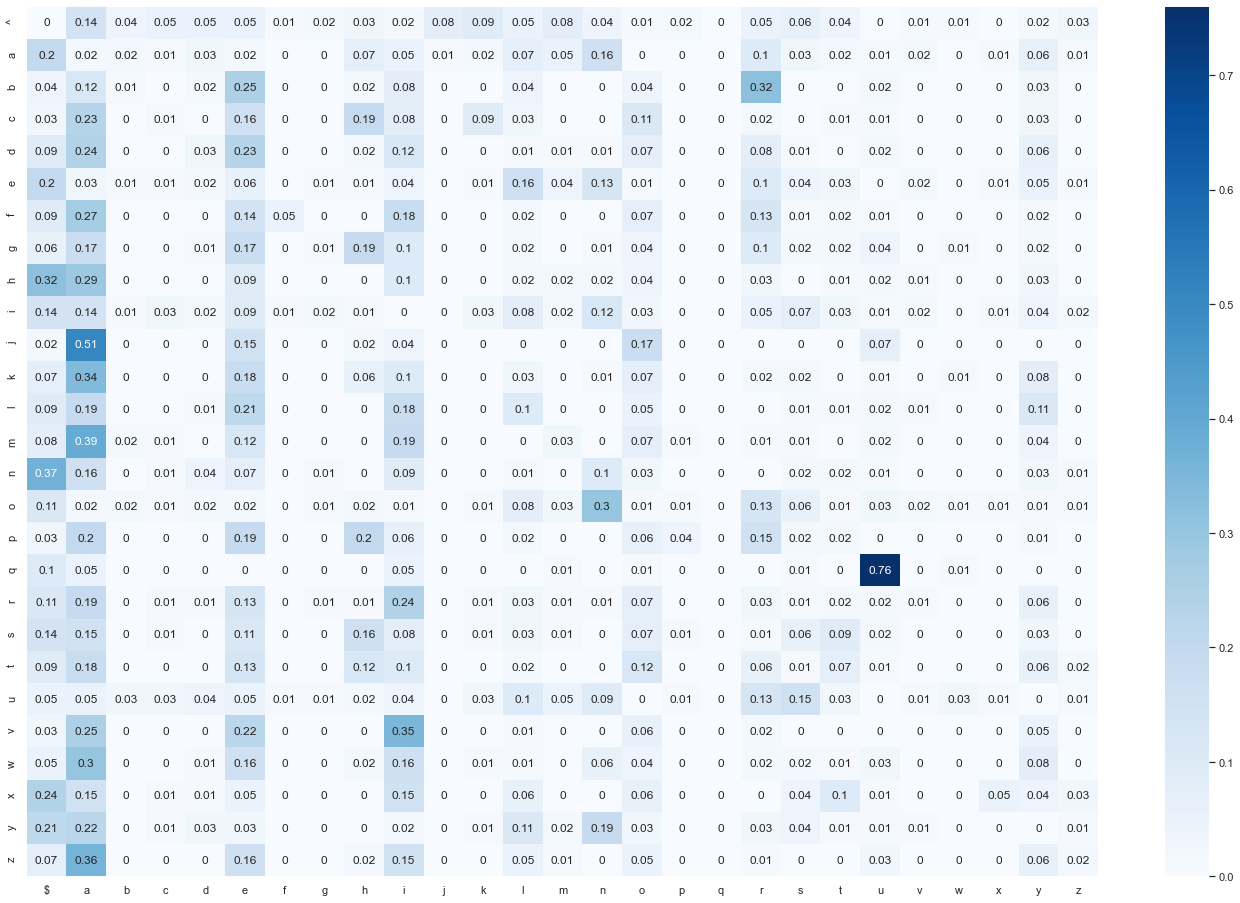

In [34]:
name_probability_df = pd.DataFrame(name_probability).sort_index().T.sort_index()
name_probability_df = name_probability_df.fillna(0)

sns.set(rc={'figure.figsize':(24, 16)})

sns.heatmap(name_probability_df.round(2), annot=True, cmap='Blues')
# name_probability_df.style.background_gradient(cmap='Blues')


**2x Бонус**

Создать нейронную сеть которая учится на выборке. Гугл в помощь!

In [37]:
import torch

import string

In [129]:
all_letters = f'{string.ascii_lowercase}$'
n_letters = len(all_letters)

In [130]:
def unicode2ascii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [131]:
import torch
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.o2o = nn.Linear(hidden_size + output_size, output_size)
        self.dropout = nn.Dropout(0.1)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        input_combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(input_combined)
        output = self.i2o(input_combined)
        output_combined = torch.cat((hidden, output), 1)
        output = self.o2o(output_combined)
        output = self.dropout(output)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [132]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingPair():
    line = randomChoice(names)
    return line

In [138]:
def inputTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li in range(len(line)):
        letter = line[li]
        tensor[li][0][all_letters.find(letter)] = 1
    return tensor

def targetTensor(line):
    letter_indexes = [all_letters.find(line[li]) for li in range(1, len(line))]
    letter_indexes.append(n_letters - 1)
    return torch.LongTensor(letter_indexes)

In [139]:
def randomTrainingExample():
    line = randomTrainingPair()
    input_line_tensor = inputTensor(line)
    target_line_tensor = targetTensor(line)
    return input_line_tensor, target_line_tensor

In [140]:
criterion = nn.NLLLoss()

learning_rate = 0.0005

def train(input_line_tensor, target_line_tensor):
    target_line_tensor.unsqueeze_(-1)
    hidden = rnn.initHidden()

    rnn.zero_grad()

    loss = 0

    for i in range(input_line_tensor.size(0)):
        output, hidden = rnn(input_line_tensor[i], hidden)
        l = criterion(output, target_line_tensor[i])
        loss += l

    loss.backward()

    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item() / input_line_tensor.size(0)

In [141]:
import time
import math

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [142]:
rnn = RNN(n_letters, 128, n_letters)

n_iters = 100000
print_every = 5000
plot_every = 500
all_losses = []
total_loss = 0

start = time.time()

for iter in range(1, n_iters + 1):
    output, loss = train(*randomTrainingExample())
    total_loss += loss

    if iter % print_every == 0:
        print('%s (%d %d%%) %.4f' % (timeSince(start), iter, iter / n_iters * 100, loss))

    if iter % plot_every == 0:
        all_losses.append(total_loss / plot_every)
        total_loss = 0

0m 12s (5000 5%) 2.8268
0m 23s (10000 10%) 2.6720
0m 36s (15000 15%) 2.7779
0m 48s (20000 20%) 1.9642
1m 0s (25000 25%) 2.1169
1m 11s (30000 30%) 2.5355
1m 23s (35000 35%) 2.3961
1m 35s (40000 40%) 2.1103
1m 47s (45000 45%) 2.5328
1m 59s (50000 50%) 2.4837
2m 10s (55000 55%) 2.4755
2m 24s (60000 60%) 2.1185
2m 37s (65000 65%) 2.2530
2m 50s (70000 70%) 2.4253
3m 2s (75000 75%) 2.6838
3m 15s (80000 80%) 2.1879
3m 28s (85000 85%) 3.1465
3m 41s (90000 90%) 2.5885
3m 54s (95000 95%) 2.2867
4m 6s (100000 100%) 2.1899


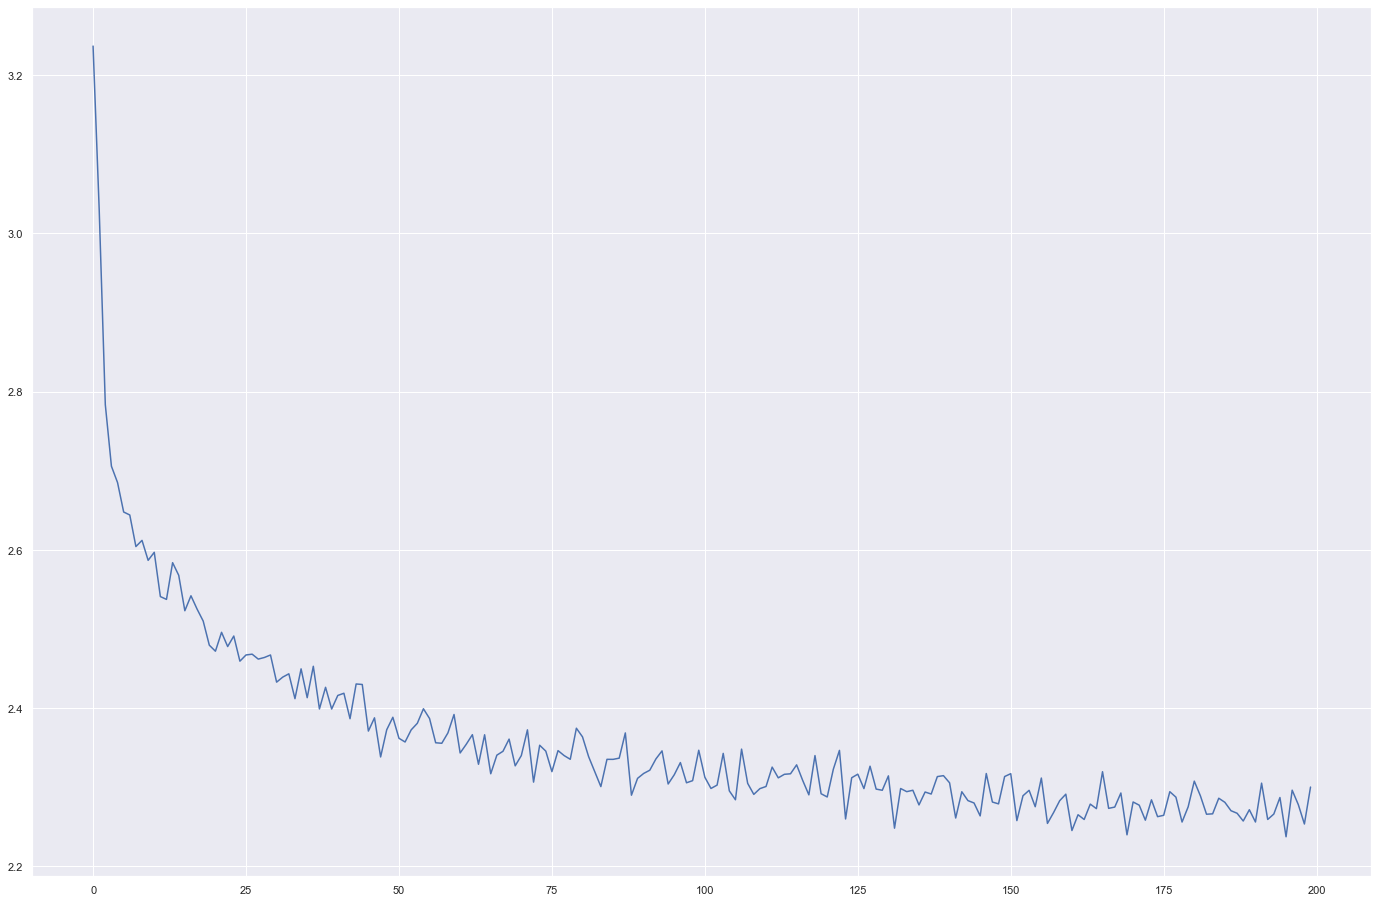

In [143]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(all_losses)
plt.show()

In [144]:
def test(start_letter='A', max_length=20):
    with torch.no_grad():
        input = inputTensor(start_letter)
        hidden = rnn.initHidden()

        output_name = start_letter

        for i in range(max_length):
            output, hidden = rnn(input[0], hidden)
            topv, topi = output.topk(1)
            topi = topi[0][0]
            if topi == n_letters - 1:
                break
            else:
                letter = all_letters[topi]
                output_name += letter
            input = inputTensor(letter)

        return output_name
    
for _ in range(30):
    first_letter = np.random.choice(list(all_letters))
    
    generated_name = test(first_letter, max_length=20)
    print('\t', generated_name)
    

	 marie
	 hania
	 mariel
	 ariana
	 kaylen
	 perin
	 carie
	 pariela
	 iahai
	 rayna
	 $arie
	 farie
	 marie
	 xanie
	 farie
	 urian
	 kaylen
	 bristen
	 iahari
	 toni
	 orial
	 ariel
	 qaylin
	 paria
	 elian
	 layna
	 ellina
	 bristen
	 naria
	 saniel
